In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models

import os
import cv2
import random
import csv


In [39]:
## read csv file image_path, label
data_file_path = "../QMIND2024_Dataset/data_files.csv"
data_file = pd.read_csv(data_file_path)
print(data_file.head())
# split data into image_path and label
images_path = data_file["filename"].values
labels = data_file["label"].values
print(images_path.shape)
print(labels.shape)

# sparate the filename from the path
images_filename = [os.path.basename(image_path) for image_path in images_path]
print(images_filename[:5])

                                            filename  label
0  QMIND2024_Dataset/dataset_images/2017041310262...      0
1  QMIND2024_Dataset/dataset_images/2017041311195...      0
2  QMIND2024_Dataset/dataset_images/2017041311201...      0
3  QMIND2024_Dataset/dataset_images/2017041311201...      0
4  QMIND2024_Dataset/dataset_images/2017041311252...      0
(12516,)
(12516,)
['20170413102628830.jpg', '20170413111955404.jpg', '20170413112015395.jpg', '20170413112017305.jpg', '20170413112528859.jpg']


False
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 28 29]
352


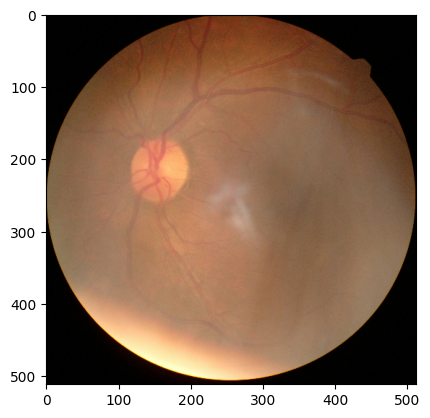

In [128]:
# investigate one random image
idx = np.random.randint(0, len(images_path))
#path = 'QMIND2024_Dataset/dataset_images/007-6170-300.jpg'
#image = cv2.imread('../'+path)
image = cv2.imread('../'+images_path[idx])
if image is None:
    print("image not exist",images_path[idx])
    
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


print(np.any(np.all(image == 0, axis=(1,2))))
# remove black rows and columns
image = image[~np.all(image <= 20, axis=(1,2))]
image = image[:, ~np.all(image <= 20, axis=(0,2))]

print(np.unique(image[:, 0, :]))
image = cv2.resize(image, (512, 512))

print(np.sum(image[5, :, :] > 3))
plt.imshow(image)
plt.show()

In [41]:
print(image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [131]:
for image_path, label, filename in zip(images_path, labels, images_filename):
    
    image = cv2.imread('../'+image_path)
    if image is None:
        print("image not exist",image_path)
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # if the image is already cropped => no black rows => skip
    # if not (np.any(np.all(image == 0, axis=(1,2))) or np.any(np.all(image == 1, axis=(1,2))) or np.any(np.all(image == 2, axis=(1,2)))):
    #     print("image is cropped",image_path)
    #     continue
    
    #print(np.any(np.all(image == 0, axis=(1,2))))
    # remove black rows and columns
    image = image[~np.all(image <= 20, axis=(1,2))]
    image = image[:, ~np.all(image <= 20, axis=(0,2))]
   

    # resize image to 512x512
    image = cv2.resize(image, (512, 512))

    # check if more than 100 pixels in the first row have values > 4
    # if so, then the image is already cropped
    if np.sum(image[5, :, :] > 3) > 350:
        print(image_path)
        continue

    # save image
    cv2.imwrite('../QMIND2024_Dataset/new_dataset_images/'+filename, cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # save image path and label to csv file
    with open('../QMIND2024_Dataset/new_dataset.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['QMIND2024_Dataset/new_dataset_images/'+filename , label])

    #print(image_path)
    # plt.imshow(image)
    # plt.show()
    

QMIND2024_Dataset/dataset_images/20170413102628830.jpg
QMIND2024_Dataset/dataset_images/20170413112015395.jpg
QMIND2024_Dataset/dataset_images/20170413112017305.jpg
QMIND2024_Dataset/dataset_images/20170413113710974.jpg
QMIND2024_Dataset/dataset_images/20170413142900064.jpg
QMIND2024_Dataset/dataset_images/20170413151851880.jpg
QMIND2024_Dataset/dataset_images/20170413151855798.jpg
QMIND2024_Dataset/dataset_images/20170413152155981.jpg
QMIND2024_Dataset/dataset_images/20170413162943058.jpg
QMIND2024_Dataset/dataset_images/20170414113605680.jpg
QMIND2024_Dataset/dataset_images/20170414113710416.jpg
QMIND2024_Dataset/dataset_images/20170414114604302.jpg
QMIND2024_Dataset/dataset_images/20170414152313848.jpg
QMIND2024_Dataset/dataset_images/20170415150529884.jpg
QMIND2024_Dataset/dataset_images/20170417105054647.jpg
QMIND2024_Dataset/dataset_images/20170417105107608.jpg
QMIND2024_Dataset/dataset_images/20170417161433082.jpg
QMIND2024_Dataset/dataset_images/20170417161513973.jpg
QMIND2024_